In [53]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) 
                           if pd.notna(x) else x))

FILTER FOR SOFTWARE ENGINEER ROLES IN THE UNITED STATES

In [54]:
df_DE_US = df[(df['job_title_short'] == 'Data Engineer') &
              (df['job_country'] == 'United States')]

EXPLORING THE JOB LOCATIONS

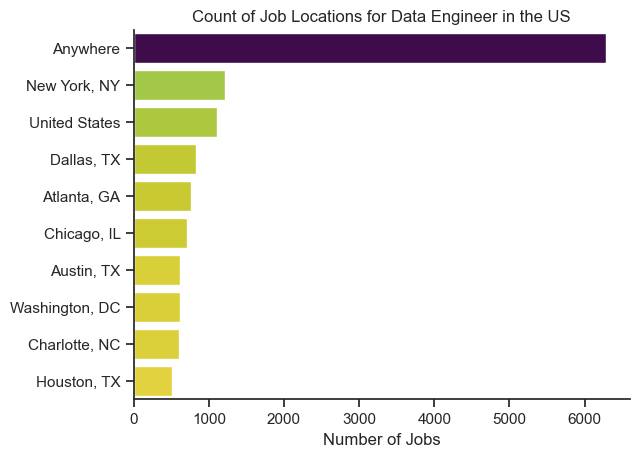

In [ ]:
df_plot = df_DE_US['job_location'].value_counts().head(10).to_frame() 
                                                    #to_frame turns result into a dataframe

#using seaborn
import seaborn as sns
sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', 
            hue = 'count', palette = 'viridis_r', legend = False)
sns.despine()

plt.title('Count of Job Locations for Data Engineer in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

EXPLORING REQUIREMENTS AND OFFERINGS FROM A JOB

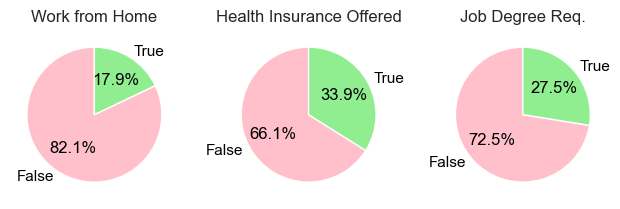

In [56]:
fig, ax = plt.subplots(1, 3)

dict_col = {
    'job_work_from_home': 'Work from Home',
    'job_health_insurance': 'Health Insurance Offered',
    'job_no_degree_mention': 'Job Degree Req.'
}

for i, (column, title) in enumerate(dict_col.items()):
    ax[i].pie(df_DE_US[column].value_counts(), startangle = 90, 
              autopct = '%1.1f%%', labels = ['False', 'True'], 
              colors = ['pink', 'lightgreen'], textprops= {'color': 'black'})
    ax[i].set_title(title)

fig.tight_layout()

plt.show()

EXPLORING JOB COMPANIES FOR DATA ENGINEER 

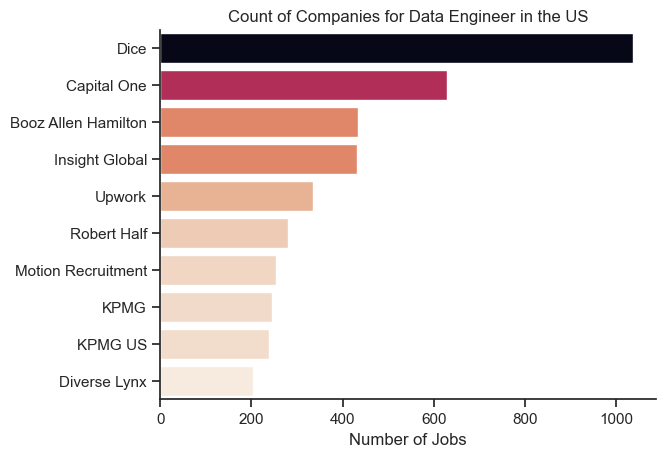

In [ ]:
df_plot = (df_DE_US['company_name']
           .value_counts().head(10).to_frame()) 
                            #to_frame turns result into a dataframe

#using seaborn
import seaborn as sns
sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', 
            hue = 'count', palette = 'rocket_r', legend = False)
sns.despine()

plt.title('Count of Companies for Data Engineer in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()